In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In C:\Users\vasan\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\vasan\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\vasan\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\vasan\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\vasan\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
# importing the data
df=pd.read_csv("survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27-08-2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27-08-2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27-08-2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27-08-2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27-08-2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


#### Removing the unwanted columns like state, self_employed, family_history, phys_health_consequence, phys_health_interview, Timestamp, comments

The reason behind deleting the above mentioned columns are explained below:
    <br>1. state - We are comparing the coutries only in the graph analysis
    <br>2. self_employed - We can avoid this because our focus is only about the corporate employees
    <br>3. family_history - We are concerning the current status only
    <br>4. phys_health_consequence - We are concern only about the mental stability
    <br>5. phys_health_interview - We are concern only about the mental stability
    <br>6. Timestamp - We are dealing with time frame so we can drop it
    <br>7. comments - It has most NaN and its not requried for the analysis

In [3]:
df.drop('state', axis=1, inplace=True)
df.drop('self_employed', axis=1, inplace=True)
df.drop('family_history', axis=1, inplace=True)
df.drop('phys_health_consequence', axis=1, inplace=True)
df.drop('phys_health_interview', axis=1, inplace=True)
df.drop('Timestamp', axis=1, inplace=True)
df.drop('comments', axis=1, inplace=True)

In [4]:
# finding the length of the dataframe
len(df)

1259

In [5]:
df.head()

,Age,Gender,Country,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,Yes,Often,Jun-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,Some of them,Yes,No,Yes,No
1,44,M,United States,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,Don't know,No
2,32,Male,Canada,No,Rarely,Jun-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Some of them,No,Maybe,No,Yes
4,31,Male,United States,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,Some of them,Yes,Yes,Don't know,No


#### We dont want the some more columns like no_employees,tech_company,benefits,care_options, wellness_program, seek_help,anonymity,supervisor,obs_consequence,work_interfere,leave

In [6]:
#droping the above mentioned columns
df.drop('no_employees', axis=1, inplace=True)
df.drop('tech_company', axis=1, inplace=True)
df.drop('benefits', axis=1, inplace=True)
df.drop('care_options', axis=1, inplace=True)
df.drop('wellness_program', axis=1, inplace=True)
df.drop('seek_help', axis=1, inplace=True)
df.drop('anonymity', axis=1, inplace=True)
df.drop('supervisor', axis=1, inplace=True)
df.drop('obs_consequence', axis=1, inplace=True)
df.drop('work_interfere', axis=1, inplace=True)
df.drop('leave', axis=1, inplace=True)

In [7]:
df.head()

,Age,Gender,Country,treatment,remote_work,mental_health_consequence,coworkers,mental_health_interview,mental_vs_physical
0,37,Female,United States,Yes,No,No,Some of them,No,Yes
1,44,M,United States,No,No,Maybe,No,No,Don't know
2,32,Male,Canada,No,No,No,Yes,Yes,No
3,31,Male,United Kingdom,Yes,No,Yes,Some of them,Maybe,No
4,31,Male,United States,No,Yes,No,Some of them,Yes,Don't know


In [8]:
#checking the NAN
len(df.dropna())

1259

So previous after droping the number of rows was 995 but now it has increased to 1259. that is there is no loss of data due to null values. Im viewing this as a great improvement in handling the missing data.

In [10]:
# finding the uniqie values in gender
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [11]:
#changing the gender for the uniformity
df['Gender'].loc[df['Gender']=='M']='Male'
df['Gender'].loc[df['Gender']=='Male']='Male'
df['Gender'].loc[df['Gender']=='male']='Male'
df['Gender'].loc[df['Gender']=='female']='Female'
df['Gender'].loc[df['Gender']=='m']='Male'
df['Gender'].loc[df['Gender']=='Male-ish']='Male'
df['Gender'].loc[df['Gender']=='Trans-female']='Female'
df['Gender'].loc[df['Gender']=='Cis Female']='Female'
df['Gender'].loc[df['Gender']=='F']='Female'
df['Gender'].loc[df['Gender']=='Cis Male']='Male' 
df['Gender'].loc[df['Gender']=='f']='Female'
df['Gender'].loc[df['Gender']=='Mal']='Male'
df['Gender'].loc[df['Gender']=='queer/she/they']='Female'
df['Gender'].loc[df['Gender']=='non-binary']='Male'
df['Gender'].loc[df['Gender']=='woman']='Female'
df['Gender'].loc[df['Gender']=='Make']='Male'
df['Gender'].loc[df['Gender']=='Nah']='Male' 
df['Gender'].loc[df['Gender']=='All']='Male'
df['Gender'].loc[df['Gender']=='Enby']='Female'
df['Gender'].loc[df['Gender']=='fluid']='Female'
df['Gender'].loc[df['Gender']=='Genderqueer']='Female'
df['Gender'].loc[df['Gender']=='Female ']='Female'
df['Gender'].loc[df['Gender']=='Androgyne']='Female'
df['Gender'].loc[df['Gender']=='Agender']='Female'
df['Gender'].loc[df['Gender']=='cis-female/femme']='Female'
df['Gender'].loc[df['Gender']=='Guy (-ish) ^_^']='Male'
df['Gender'].loc[df['Gender']=='male leaning androgynous']='Male'
df['Gender'].loc[df['Gender']=='Trans woman']='Female'
df['Gender'].loc[df['Gender']== 'msle']='Male'
df['Gender'].loc[df['Gender']=='Neuter']='Female'
df['Gender'].loc[df['Gender']=='Female (trans)']='Female'
df['Gender'].loc[df['Gender']=='queer']='Female'
df['Gender'].loc[df['Gender']=='Female (cis)']='Female'
df['Gender'].loc[df['Gender']=='Mail']='Male'
df['Gender'].loc[df['Gender']=='cis male']='Male'
df['Gender'].loc[df['Gender']=='A little about you']='Female'
df['Gender'].loc[df['Gender']=='Malr']='Male'
df['Gender'].loc[df['Gender']=='p']='Female'
df['Gender'].loc[df['Gender']=='Woman']='Female'
df['Gender'].loc[df['Gender']=='femail']='Female'
df['Gender'].loc[df['Gender']=='Cis Man']='Male'
                 

C:\Users\vasan\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [12]:
#finding the unique value of gender
df['Gender'].unique()

array(['Female', 'Male', 'maile', 'something kinda male?', 'Male (CIS)',
       'Femake', 'Male ', 'Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [13]:
#changing all to male and female
df['Gender'].loc[df['Gender']=='Male ']='Male'
df['Gender'].loc[df['Gender']=='ostensibly male, unsure what that really means']='Male'

In [14]:
df['Gender'].unique()

array(['Female', 'Male', 'maile', 'something kinda male?', 'Male (CIS)',
       'Femake', 'Man'], dtype=object)

In [15]:
#changing all to male and female
df['Gender'].loc[df['Gender']=='maile']='Male'
df['Gender'].loc[df['Gender']=='something kinda male?']='Male'
df['Gender'].loc[df['Gender']=='Male (CIS)']='Male'
df['Gender'].loc[df['Gender']=='Man']='Male'
df['Gender'].loc[df['Gender']=='Femake']='Female'

In [16]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

#### Changing the column name for ease of use

In [17]:
df=df.rename(columns={'Age':'AGE','Gender':'GENDER','Country':'COUNTRY','treatment':'TREATMENT',
                      'remote_work':'REMOTE','mental_health_consequence':'MENTAL_HEALTH','coworkers':'COWORKERS',
                      'mental_health_interview':'MENTAL_INTERVIEW','mental_vs_physical':'MENTAL_VS_PHY'})

### 1. Comparing the mental illness of employees based on the gender category.

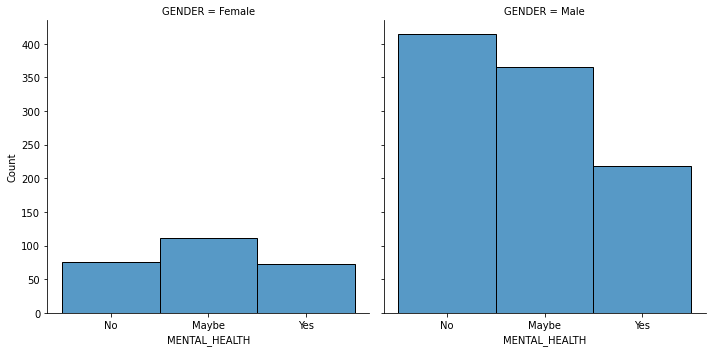

In [18]:
# comparing the mental health and gender
import seaborn as sns
sns.displot(df, x="MENTAL_HEALTH", col="GENDER")

### 2.Comparing the mental illness of employees based on the countries.

In [19]:
#finding the unique values of countires
df['COUNTRY'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [20]:
# changing the COUNTRY name to its correspnding code
df['COUNTRY'].loc[df['COUNTRY']=='United States']='USA'
df['COUNTRY'].loc[df['COUNTRY']=='Canada']='CAN'
df['COUNTRY'].loc[df['COUNTRY']=='United Kingdom']='UK'
df['COUNTRY'].loc[df['COUNTRY']=='Bulgaria']='BGR'
df['COUNTRY'].loc[df['COUNTRY']=='France']='FRA'
df['COUNTRY'].loc[df['COUNTRY']=='Portugal']='PRT'
df['COUNTRY'].loc[df['COUNTRY']=='Netherlands']='NLD'
df['COUNTRY'].loc[df['COUNTRY']=='Switzerland']='SWZ'
df['COUNTRY'].loc[df['COUNTRY']=='Poland']='POL'
df['COUNTRY'].loc[df['COUNTRY']=='Australia']='AUS'
df['COUNTRY'].loc[df['COUNTRY']=='Germany']='DEU'
df['COUNTRY'].loc[df['COUNTRY']=='Mexico']='MEX'
df['COUNTRY'].loc[df['COUNTRY']=='Brazil']='BRA'
df['COUNTRY'].loc[df['COUNTRY']=='Slovenia']='SVN'
df['COUNTRY'].loc[df['COUNTRY']=='Ireland']='IRE'
df['COUNTRY'].loc[df['COUNTRY']=='India']='IND'
df['COUNTRY'].loc[df['COUNTRY']=='South Africa']='ZAF'
df['COUNTRY'].loc[df['COUNTRY']=='Russia']='USSR'
df['COUNTRY'].loc[df['COUNTRY']=='Italy']='ITA'
df['COUNTRY'].loc[df['COUNTRY']=='Colombia']='COL'
df['COUNTRY'].loc[df['COUNTRY']=='Portugal']='POR'
df['COUNTRY'].loc[df['COUNTRY']=='Switzerland']='SWZ'
df['COUNTRY'].loc[df['COUNTRY']=='Belgium']='BEL'
df['COUNTRY'].loc[df['COUNTRY']=='Sweden']='SWE'
df['COUNTRY'].loc[df['COUNTRY']=='New Zealand']='NZL'
df['COUNTRY'].loc[df['COUNTRY']=='Zimbabwe']='ZMB'
df['COUNTRY'].loc[df['COUNTRY']=='Finland']='FIN'
df['COUNTRY'].loc[df['COUNTRY']=='Israel']='ISR'
df['COUNTRY'].loc[df['COUNTRY']=='Bosnia and Herzegovina']='BIH'
df['COUNTRY'].loc[df['COUNTRY']=='Austria']='AUT'
df['COUNTRY'].loc[df['COUNTRY']=='Hungary']='HUN'
df['COUNTRY'].loc[df['COUNTRY']=='Singapore']='SIN'
df['COUNTRY'].loc[df['COUNTRY']=='Japan']='JPN'
df['COUNTRY'].loc[df['COUNTRY']=='Croatia']='CRO'
df['COUNTRY'].loc[df['COUNTRY']=='Thailand']='THL'
df['COUNTRY'].loc[df['COUNTRY']=='Denmark']='DEN'
df['COUNTRY'].loc[df['COUNTRY']=='Bahamas, The']='BHS'
df['COUNTRY'].loc[df['COUNTRY']=='Moldova']='MOL'
df['COUNTRY'].loc[df['COUNTRY']=='Georgia']='GEO'
df['COUNTRY'].loc[df['COUNTRY']=='China']='CHN'
df['COUNTRY'].loc[df['COUNTRY']=='Czech Republic']='CZE'
df['COUNTRY'].loc[df['COUNTRY']=='Philippines']='PHL'
df['COUNTRY'].loc[df['COUNTRY']=='Costa Rica']='CSR'
df['COUNTRY'].loc[df['COUNTRY']=='Romania']='RMR'
df['COUNTRY'].loc[df['COUNTRY']=='Latvia']='LAT'
df['COUNTRY'].loc[df['COUNTRY']=='Spain']='SPN'
df['COUNTRY'].loc[df['COUNTRY']=='Greece']='GRE'
df['COUNTRY'].loc[df['COUNTRY']=='Nigeria']='NIA'

C:\Users\vasan\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [21]:
df['MENTAL_HEALTH'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

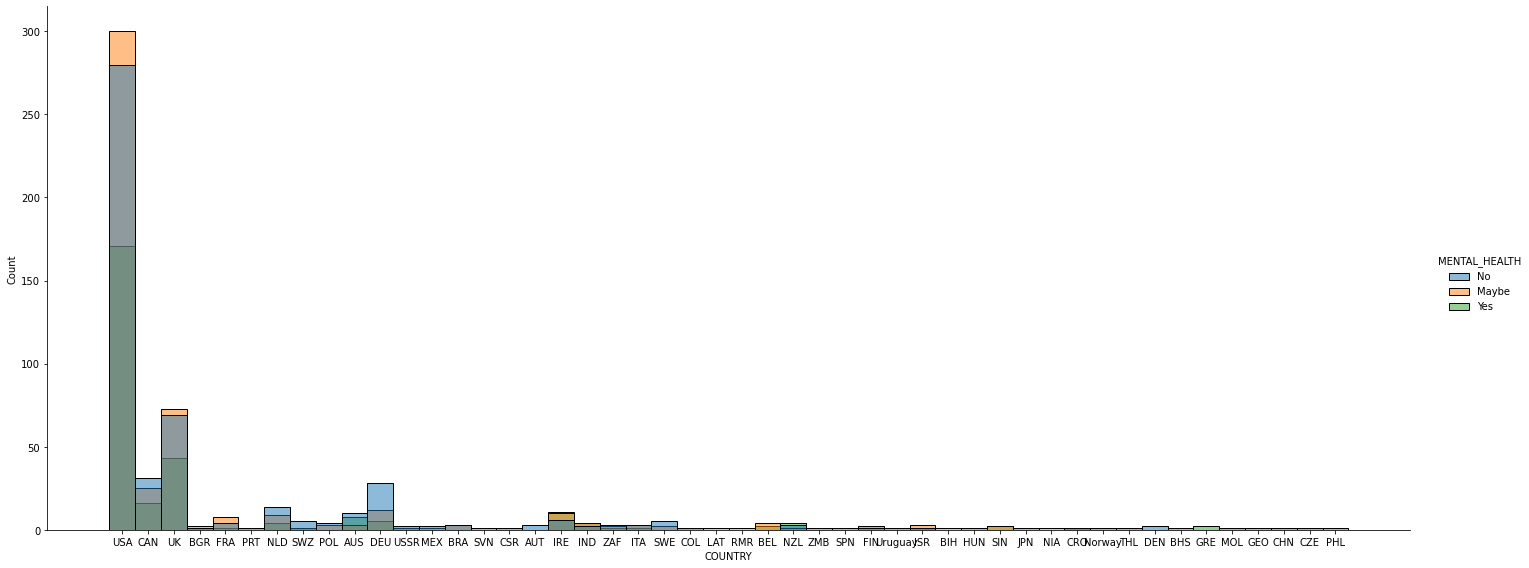

In [22]:
#ploting countrywise mental health
sns.displot(df, x="COUNTRY", hue="MENTAL_HEALTH",height=8,aspect=20/8)

### 3.Comparing the mental illness of employees based on the remote work culture.

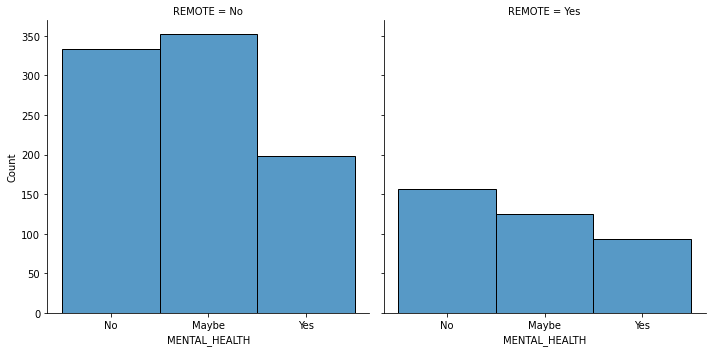

In [23]:
#comparing the mental health based on the remote work culture
sns.displot(df, x="MENTAL_HEALTH", col="REMOTE")

### 4.Comparing the mental illness of employees based on the co-workers.

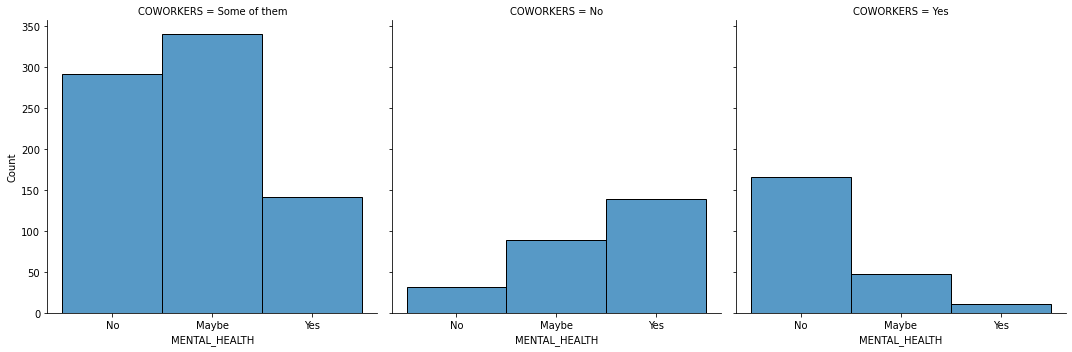

In [24]:
#comparing the mental health based on the coworkers
sns.displot(df, x="MENTAL_HEALTH", col="COWORKERS")

Based on the above graphical analysis we find the below observations:
<br>1. The mental illness for men is higher than the women
<br>2. "The mental illness rate in the United States is way higher than the Bahamas" this was my last week's conclusion. But, after a certain deeper analysis, I have included all the countries and also did a graph with countries having several people with illness and without. In both, USA is the first and it shows that the number of entries is different for different countries and last week's conclusion is wrong.
<br>3. Remote employees also have a mental illness at the same rate as non-remote workers. So remote jobs won't give that much relief for the mental illness
<br>4. If we have more co-workers then there is a high possibility of reducing mental illness.

### Building a model and evaluating

In [26]:
#importing libraries
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Sklearn regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Sklearn regression model evaluation function
from sklearn.metrics import mean_absolute_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
plt.style.use('bmh')

In [28]:
#print df
df.head()

,AGE,GENDER,COUNTRY,TREATMENT,REMOTE,MENTAL_HEALTH,COWORKERS,MENTAL_INTERVIEW,MENTAL_VS_PHY
0,37,Female,USA,Yes,No,No,Some of them,No,Yes
1,44,Male,USA,No,No,Maybe,No,No,Don't know
2,32,Male,CAN,No,No,No,Yes,Yes,No
3,31,Male,UK,Yes,No,Yes,Some of them,Maybe,No
4,31,Male,USA,No,Yes,No,Some of them,Yes,Don't know


#### Changing all string data to number

In [30]:
#changing male and female to 1 and 2
df['GENDER'].loc[df['GENDER']=='Male']=1
df['GENDER'].loc[df['GENDER']=='Female']=2

In [31]:
df['TREATMENT'].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
#changing treatment yes and no to 1 and 0
df['TREATMENT'].loc[df['TREATMENT']=='Yes']=1
df['TREATMENT'].loc[df['TREATMENT']=='No']=0

In [33]:
df['REMOTE'].unique()

array(['No', 'Yes'], dtype=object)

In [34]:
df['REMOTE'].loc[df['REMOTE']=='Yes']=1
df['REMOTE'].loc[df['REMOTE']=='No']=0

In [35]:
df['MENTAL_HEALTH'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [36]:
df['MENTAL_HEALTH'].loc[df['MENTAL_HEALTH']=='Yes']=1
df['MENTAL_HEALTH'].loc[df['MENTAL_HEALTH']=='No']=0
df['MENTAL_HEALTH'].loc[df['MENTAL_HEALTH']=='Maybe']=0.5

In [37]:
df['COWORKERS'].unique()

array(['Some of them', 'No', 'Yes'], dtype=object)

In [38]:
df['COWORKERS'].loc[df['COWORKERS']=='Yes']=1
df['COWORKERS'].loc[df['COWORKERS']=='No']=0
df['COWORKERS'].loc[df['COWORKERS']=='Some of them']=0.5

In [39]:
df['MENTAL_INTERVIEW'].unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [40]:
df['MENTAL_INTERVIEW'].loc[df['MENTAL_INTERVIEW']=='Yes']=1
df['MENTAL_INTERVIEW'].loc[df['MENTAL_INTERVIEW']=='No']=0
df['MENTAL_INTERVIEW'].loc[df['MENTAL_INTERVIEW']=='Maybe']=0.5

In [41]:
df['MENTAL_VS_PHY'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [42]:
df['MENTAL_VS_PHY'].loc[df['MENTAL_VS_PHY']=='Yes']=1
df['MENTAL_VS_PHY'].loc[df['MENTAL_VS_PHY']=='No']=0
df['MENTAL_VS_PHY'].loc[df['MENTAL_VS_PHY']=="Don't know"]=0.5

In [43]:
df['GENDER'].unique()

array([2, 1], dtype=object)

In [44]:
df.head()

,AGE,GENDER,COUNTRY,TREATMENT,REMOTE,MENTAL_HEALTH,COWORKERS,MENTAL_INTERVIEW,MENTAL_VS_PHY
0,37,2,USA,1,0,0,0.5,0,1
1,44,1,USA,0,0,0.5,0,0,0.5
2,32,1,CAN,0,0,0,1,1,0
3,31,1,UK,1,0,1,0.5,0.5,0
4,31,1,USA,0,1,0,0.5,1,0.5


In [60]:
y = df["MENTAL_HEALTH"]
y=y.astype('int')
X = df[['GENDER', 'TREATMENT', 'REMOTE', 'COWORKERS', 'MENTAL_INTERVIEW', 'MENTAL_VS_PHY']]

In [61]:
# Split dataset into random train and test subsets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [62]:

from sklearn.preprocessing import StandardScaler
# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [63]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [64]:
# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [65]:
# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

In [66]:
# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 

[[182  21]
 [ 25  24]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       203
           1       0.53      0.49      0.51        49

    accuracy                           0.82       252
   macro avg       0.71      0.69      0.70       252
weighted avg       0.81      0.82      0.81       252



In [74]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(1007, 6)
(252, 6)


In [75]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(1007,)
(252,)


In [77]:
from sklearn.linear_model import LogisticRegression
#train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
import sklearn.metrics as metrics
#make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.8293650793650794


In [80]:
#Repeat for KNN with K=5:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8174603174603174


In [81]:
#Repeat for KNN with K=1:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8174603174603174


In [82]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.753968253968254, 0.8293650793650794, 0.7936507936507936, 0.7936507936507936, 0.8174603174603174, 0.7976190476190477, 0.8174603174603174, 0.8095238095238095, 0.8253968253968254, 0.8333333333333334, 0.8293650793650794, 0.8333333333333334, 0.8214285714285714, 0.8293650793650794, 0.7976190476190477, 0.8293650793650794, 0.8134920634920635, 0.8333333333333334, 0.8293650793650794, 0.8293650793650794, 0.8293650793650794, 0.8412698412698413, 0.8253968253968254, 0.8373015873015873, 0.8412698412698413]


Text(0, 0.5, 'Testing Accuracy')

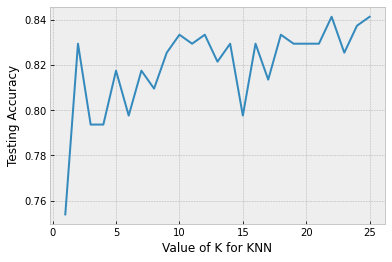

In [83]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### Summaries

As per the classification regression and KNeighborsRegressoion after evaluating the accuracy of the training model we got the output around 0.84